# Activity: Build a decision tree

## Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience.

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [1]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

### Load the dataset

`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
df_original = pd.read_csv("Invistico_Airline.csv")

### Output the first 10 rows of data

In [3]:
print(df_original.head(10))

  satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   
5    satisfied  Loyal Customer   30  Personal Travel       Eco   
6    satisfied  Loyal Customer   66  Personal Travel       Eco   
7    satisfied  Loyal Customer   10  Personal Travel       Eco   
8    satisfied  Loyal Customer   56  Personal Travel  Business   
9    satisfied  Loyal Customer   22  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                            

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes:

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data.

In [4]:
print(df_original.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

### Output unique values

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column.

In [5]:
print(df_original['Class'].unique())

['Eco' 'Business' 'Eco Plus']


### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels.

In [6]:
print(df_original['satisfaction'].value_counts())

print(df_original['satisfaction'].value_counts(normalize=True))

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64
satisfaction
satisfied       0.547328
dissatisfied    0.452672
Name: proportion, dtype: float64


**Question:** How many satisfied and dissatisfied customers were there?

Satisfied: 71087 Dissatisfied: 58793

**Question:** What percentage of customers were satisfied?

54.73%

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data.

In [7]:
df_original.isna().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


**Question:** Why is it important to check how many rows and columns there are in the dataset?

1. To know how large the dataset is.
2. To know if dropping some number of rows is significant.
3. To know whether cross validation is needed in training.

### Check the number of rows and columns in the dataset

In [8]:
print(df_original.shape)

(129880, 22)


### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [14]:
df_subset = df_original.dropna()

### Check for missing values

Check that `df_subset` does not contain any missing values.

In [10]:
df_subset.isna().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [15]:
print(df_subset.shape)

(129487, 22)


### Encode the data

Four columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric.

In [16]:
df_subset['Class'] = df_subset['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1})

print(df_subset['Class'])



0         1
1         3
2         1
3         1
4         1
         ..
129875    1
129876    3
129877    1
129878    1
129879    1
Name: Class, Length: 129487, dtype: int64


<ipython-input-16-a4eb9cab0fd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Class'] = df_subset['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1})


### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column.

In [17]:
df_subset['satisfaction'] = np.where(df_subset['satisfaction'] == "satisfied", 1, 0)
df_subset['satisfaction'] = df_subset['satisfaction'].astype('int')
# print(df_subset['satisfaction'])

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129487, dtype: int64


<ipython-input-17-23e4d0354786>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['satisfaction'] = np.where(df_subset['satisfaction'] == "satisfied", 1, 0)
<ipython-input-17-23e4d0354786>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['satisfaction'] = df_subset['satisfaction'].astype('int')


### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [18]:
categorical_cols = ['Customer Type', 'Type of Travel']
df_subset = pd.get_dummies(df_subset, columns=categorical_cols, drop_first=True)

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [19]:
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Age                                129487 non-null  int64  
 2   Class                              129487 non-null  int64  
 3   Flight Distance                    129487 non-null  int64  
 4   Seat comfort                       129487 non-null  int64  
 5   Departure/Arrival time convenient  129487 non-null  int64  
 6   Food and drink                     129487 non-null  int64  
 7   Gate location                      129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Inflight entertainment             129487 non-null  int64  
 10  Online support                     129487 non-null  int64  
 11  Ease of Online booking             129487 no

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set.

In [20]:
# Define the y (target) variable
y = df_subset['satisfaction']

# Define the X (predictor) variables
X = df_subset.copy()
X = X.drop('satisfaction', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`.

In [22]:
### YOUR CODE HERE ###
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)


**Question:** What are some advantages of using decision trees versus other models you have learned about?

- Requires relatively few pre-processing steps
- Can work easily with all types of variables (continuous, categorical, discrete)
- Do not require normalization or scaling
- Decisions are transparent
- Not affected by extreme univariate values

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [24]:
# Generate performance metrics
print("Accuracy:", "%.4f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.4f" % precision_score(y_test, dt_pred))
print("Recall:", "%.4f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.4f" % f1_score(y_test, dt_pred))

Accuracy: 0.9356
Precision: 0.9403
Recall: 0.9418
F1 Score: 0.9411


**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

It could be optimized with a grid search of hyperparameters.

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

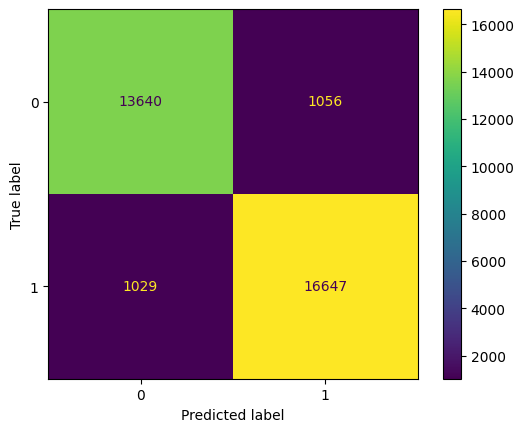

In [25]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Returns a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

# Generate confusion matrix
conf_matrix_plot(decision_tree, X_test, y_test)

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

There are proportional numbers of true positive and negatives, as well as false positive and negatives.

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

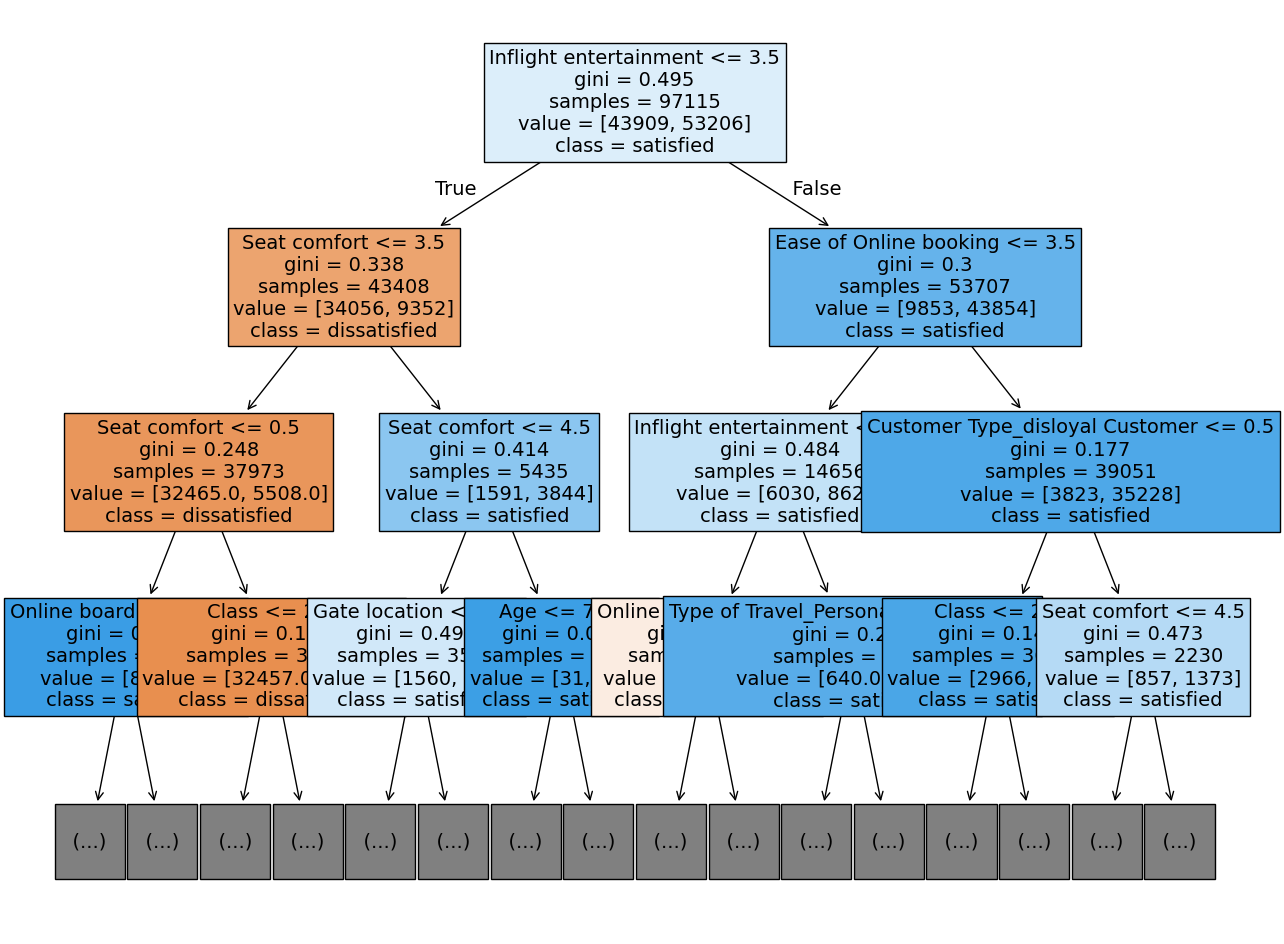

In [27]:
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=3, fontsize=14, feature_names=X.columns,
          class_names={0:'dissatisfied', 1:'satisfied'}, filled=True);
plt.show()

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [30]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = ['accuracy', 'precision', 'recall', 'f1']

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set.

**Note:** This cell may take up to 15 minutes to run.

In [31]:
tuned_decision_tree = DecisionTreeClassifier(random_state = 0)

clf = GridSearchCV(tuned_decision_tree,
      tree_para,
      scoring = scoring,
      cv=5,
      refit="f1")

# Fit the model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

**Question:** How can you determine the best combination of values for the hyperparameters?

Use the best_estimator_ property of the trained classified.

### Compute the best combination of values for the hyperparameters

In [32]:
print(clf.best_estimator_)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=9, random_state=0)


**Question:** What is the best combination of values for the hyperparameters?

max_depth: 16
min_sample_leaf: 9

<strong> Question: What was the best average validation score? </strong>

In [33]:
### YOUR CODE HERE ###
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9434


0.9434

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways.

In [34]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)
print(result_table)

                 Model        F1    Recall  Precision  Accuracy
0  Tuned Decision Tree  0.943384  0.935646   0.951265  0.938475


**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

The F1 score increased a very small amount, as did most other measures. Since the optimization ran in a reasonable time (15 min), it was probably worth the slight performance improvement. If the dataset was very large (hundreds of millions of rows), it would not be worth it.

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

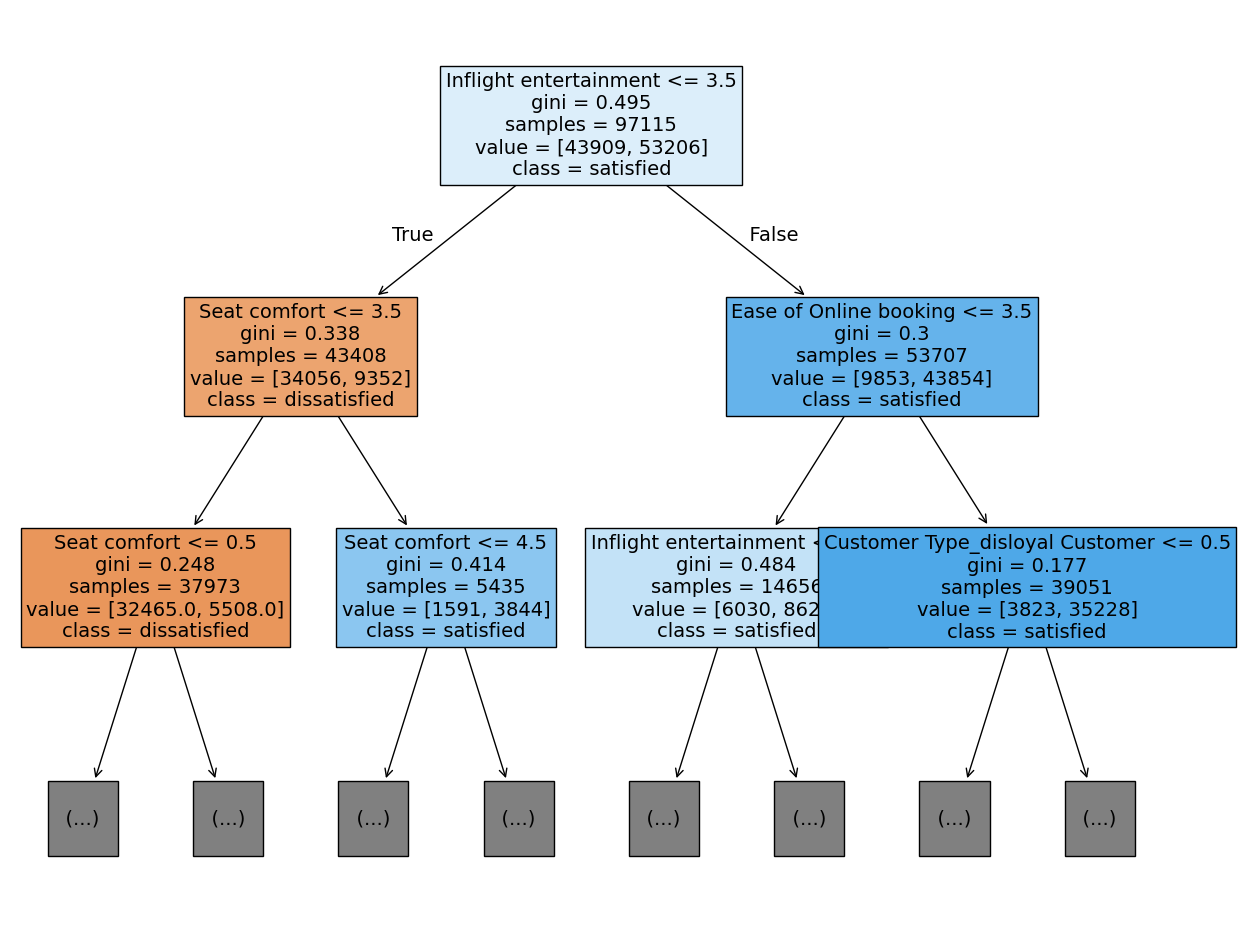

In [35]:
plt.figure(figsize=(15,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns,
          class_names={0:'dissatisfied', 1:'satisfied'}, filled=True);
plt.show()

Which features did the model use first to sort the samples? Inflight entertainment <= 3.5, then Seat comfort and East of Online Booking.

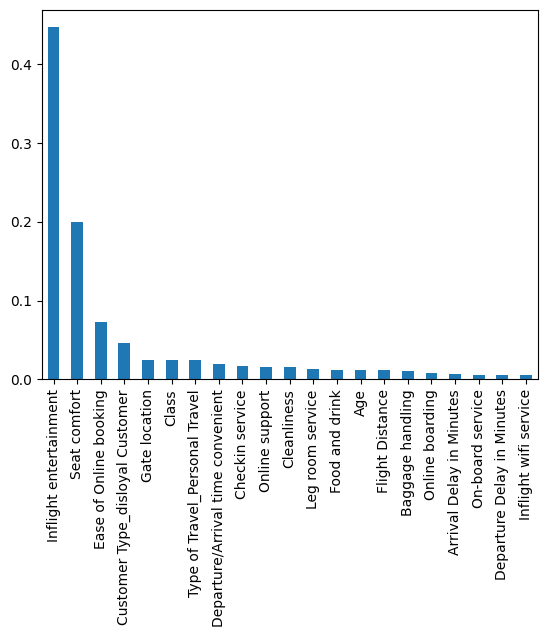

In [37]:
# Plot feature importances
importances = clf.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

## Conclusion

**What are some key takeaways that you learned from this lab?**

How to create and evaluate a decision tree classifier.
How to run a grid search to tune hyperparameters.
How to plot a trained decision tree to see how it created splits in the data and what feature were most important.

**What findings would you share with others?**

Sometimes, running an expensive grid search does not result in much improvement in the model.
Inflight entertainment is the most important feature in customer satisfaction.

**What would you recommend to stakeholders?**

Focus on Inflight entertainment, Seat comfort, and east of online booking to improve customer satisfaction.
